In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error



df = pd.read_csv("CO2_data.csv")


imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X = df_imputed[['Pressure', 'Temperature']]
y = df_imputed['CO2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


regressor = KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='brute', p =2, leaf_size= 20)

param_grid = {
    'n_neighbors': [1, 2, 5, 10],  # Expand range of neighbors
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2, 3],  # Try additional values for the power parameter
    'leaf_size': [10, 20, 30, 40, 50],  # Add leaf size as another parameter to tune
}

regressor.fit(X_train_scaled, y_train)

grid_search = GridSearchCV(regressor, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_regressor = grid_search.best_estimator_
best_score = best_regressor.score(X_test_scaled, y_test)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", best_score)
train_score = best_regressor.score(X_train_scaled, y_train)
test_score = regressor.score(X_test_scaled, y_test)
y_pred = best_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

print("Actual Score: ", regressor.score(X_test_scaled, y_test))



Best Parameters:  {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best Score:  0.9239934289444303
Actual Score:  0.9775152248360958


,Pressure,Temperature,CO2,mNaCl
count,491.000000,491.000000,491.000000,491.000000
mean,197.624420,89.858411,0.058528,0.082077
std,309.233286,94.514777,0.117662,0.382272
min,0.755000,0.990000,0.000803,0.000000
25%,21.460000,15.655000,0.014200,0.000000
50%,80.800000,50.000000,0.021500,0.000000
75%,200.000000,150.000000,0.039500,0.000000
max,1500.000000,350.000000,1.032000,3.000000


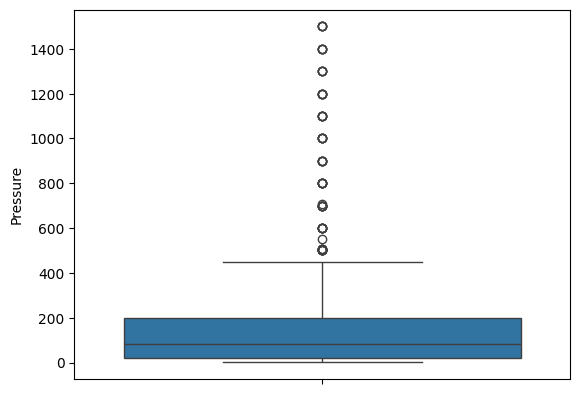

In [2]:
import seaborn as sns

sns.boxplot(df_imputed['Pressure'])
df_imputed.describe()



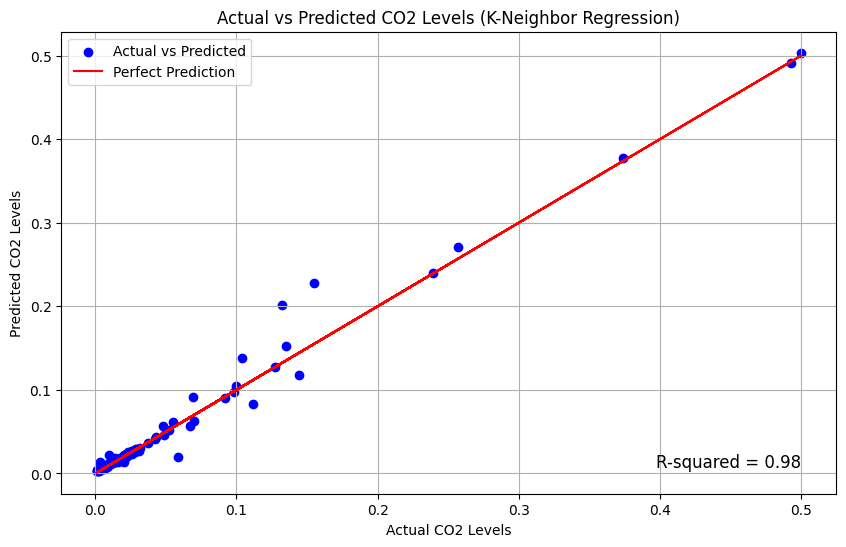

In [3]:

y_pred = regressor.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linestyle='-', label='Perfect Prediction')
plt.title('Actual vs Predicted CO2 Levels (K-Neighbor Regression)')
plt.xlabel('Actual CO2 Levels')
plt.ylabel('Predicted CO2 Levels')
plt.legend()
plt.grid(True)
plt.text(max(y_test), min(y_pred), f'R-squared = {test_score:.2f}', fontsize=12, verticalalignment='bottom', horizontalalignment='right')


plt.show()

## ML Algorithms to do: 
- Decision Trees
- Random Forest
- Extra Trees
- Extreme Gradient Boosting (XZ) boost
- SVM (Hyperparameter tuning)
- MLP 


## Decision Tree Regression


## MLP Regressor


In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

df = pd.read_csv("CO2_data.csv")

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X = df_imputed[['Pressure', 'Temperature']]
y = df_imputed['CO2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressor = MLPRegressor(random_state=42)

param_grid ={
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],  # Specify different sizes of hidden layers
    'activation': ['relu', 'tanh'],  # Activation functions to try
    'solver': ['adam', 'sgd'],  # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty (regularization parameter)
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedule
}

regressor.fit(X_train_scaled, y_train)

grid_search = GridSearchCV(regressor, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_regressor = grid_search.best_estimator_
best_score = best_regressor.score(X_test_scaled, y_test)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", best_score)

train_score = best_regressor.score(X_train_scaled, y_train)
test_score = best_regressor.score(X_test_scaled, y_test)
y_pred = best_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

print("Train Score:", train_score)
print("Test Score:", test_score)
print("Mean Squared Error:", mse)


Best Parameters:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate': 'constant', 'solver': 'adam'}
Best Score:  0.7040070570052915
Train Score: 0.49721150022716154
Test Score: 0.7040070570052915
Mean Squared Error: 0.002160551020989837


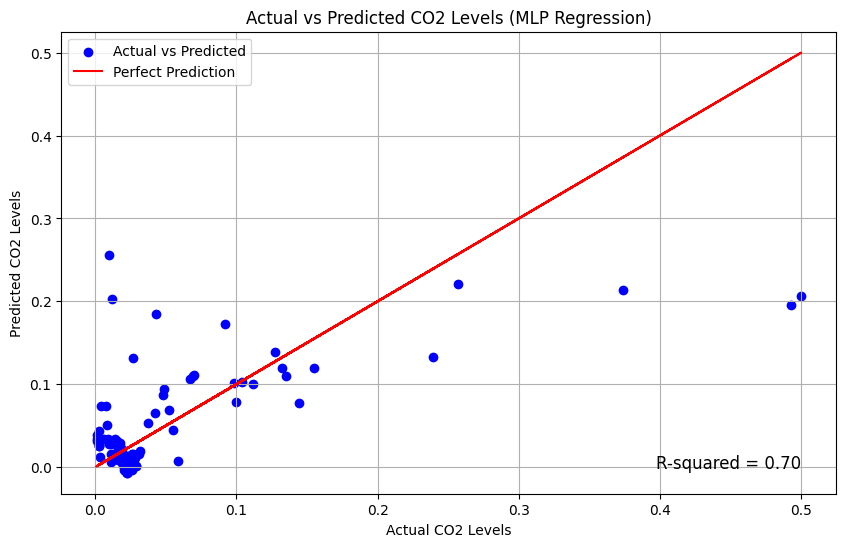

In [59]:

y_pred = regressor.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linestyle='-', label='Perfect Prediction')
plt.title('Actual vs Predicted CO2 Levels (MLP Regression)')
plt.xlabel('Actual CO2 Levels')
plt.ylabel('Predicted CO2 Levels')
plt.legend()
plt.grid(True)
plt.text(max(y_test), min(y_pred), f'R-squared = {test_score:.2f}', fontsize=12, verticalalignment='bottom', horizontalalignment='right')


plt.show()

## SVM


In [60]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

df = pd.read_csv("CO2_data.csv")

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X = df_imputed[['Pressure', 'Temperature']]
y = df_imputed['CO2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressor = SVR()

param_grid ={
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Specify different types of kernels
    'C': [0.1, 1, 10],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5],  # Epsilon in the epsilon-insensitive loss function
}

regressor.fit(X_train_scaled, y_train)

grid_search = GridSearchCV(regressor, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_regressor = grid_search.best_estimator_
best_score = best_regressor.score(X_test_scaled, y_test)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", best_score)

train_score = best_regressor.score(X_train_scaled, y_train)
test_score = best_regressor.score(X_test_scaled, y_test)
y_pred = best_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

print("Train Score:", train_score)
print("Test Score:", test_score)
print("Mean Squared Error:", mse)


Best Parameters:  {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Best Score:  0.6942252373699753
Train Score: 0.43628809201332786
Test Score: 0.6942252373699753
Mean Squared Error: 0.0022319517786781673


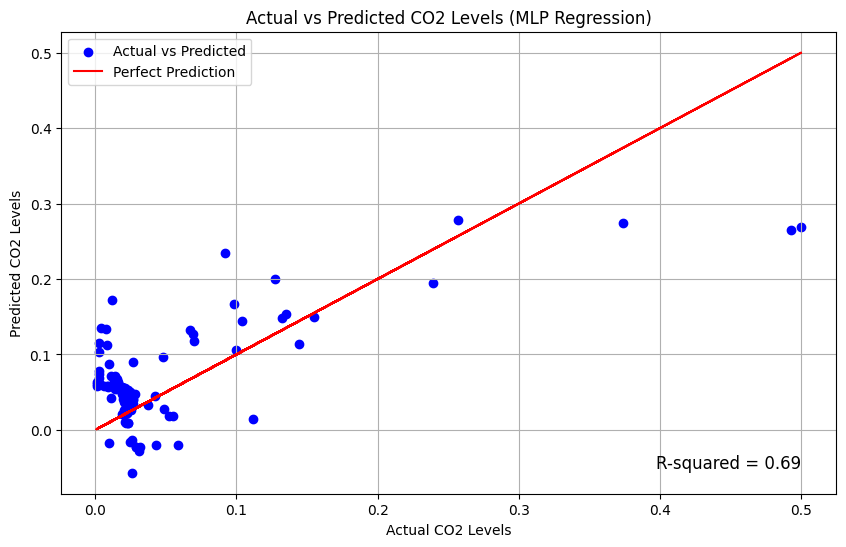

In [61]:

y_pred = regressor.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linestyle='-', label='Perfect Prediction')
plt.title('Actual vs Predicted CO2 Levels (MLP Regression)')
plt.xlabel('Actual CO2 Levels')
plt.ylabel('Predicted CO2 Levels')
plt.legend()
plt.grid(True)
plt.text(max(y_test), min(y_pred), f'R-squared = {test_score:.2f}', fontsize=12, verticalalignment='bottom', horizontalalignment='right')


plt.show()

## Bayesian Optimization

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization

# Load the dataset
df = pd.read_csv("CO2_data.csv")

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into features (X) and target variable (y)
X = df_imputed[['Pressure', 'Temperature']]
y = df_imputed['CO2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the objective function for Bayesian Optimization
def svr_cv(C, epsilon):
    model = SVR(C=C, epsilon=epsilon)
    model.fit(X_train_scaled, y_train)
    return model.score(X_test_scaled, y_test)

# Define the search space for hyperparameters
pbounds = {'C': (0.1, 10), 'epsilon': (0.01, 0.5)}

# Perform Bayesian Optimization
optimizer = BayesianOptimization(
    f=svr_cv,
    pbounds=pbounds,
    random_state=42,
)

# Maximize the objective function
optimizer.maximize(init_points=5, n_iter=10)

# Get the best hyperparameters
best_params = optimizer.max['params']

# Train SVR with the best hyperparameters
best_regressor = SVR(**best_params)
best_regressor.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = best_regressor.score(X_train_scaled, y_train)
test_score = best_regressor.score(X_test_scaled, y_test)
y_pred = best_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

print("Best Parameters: ", best_params)
print("Train Score:", train_score)
print("Test Score:", test_score)
print("Mean Squared Error:", mse)

|   iter    |  target   |     C     |  epsilon  |
-------------------------------------------------
| 1         | -20.74    | 3.808     | 0.4759    |
| 2         | -1.766    | 7.347     | 0.3033    |
| 3         | 0.4879    | 1.645     | 0.08644   |
| 4         | -14.77    | 0.675     | 0.4344    |
| 5         | -1.251    | 6.051     | 0.357     |
| 6         | -0.5548   | 6.762     | 0.2701    |
| 7         | 0.6955    | 8.757     | 0.01      |
| 8         | -20.24    | 9.726     | 0.5       |
| 9         | 0.6168    | 8.794     | 0.03332   |
| 10        | 0.6992    | 2.362     | 0.01      |
| 11        | -20.56    | 8.272     | 0.5       |
| 12        | -26.37    | 2.064     | 0.5       |
| 13        | -16.77    | 6.43      | 0.4577    |
| 14        | -0.9796   | 7.037     | 0.2601    |
| 15        | 0.6957    | 6.86      | 0.01      |
Best Parameters:  {'C': 2.362308186952614, 'epsilon': 0.01}
Train Score: 0.43455628685138303
Test Score: 0.6991666458107022
Mean Squared Error: 0.0021

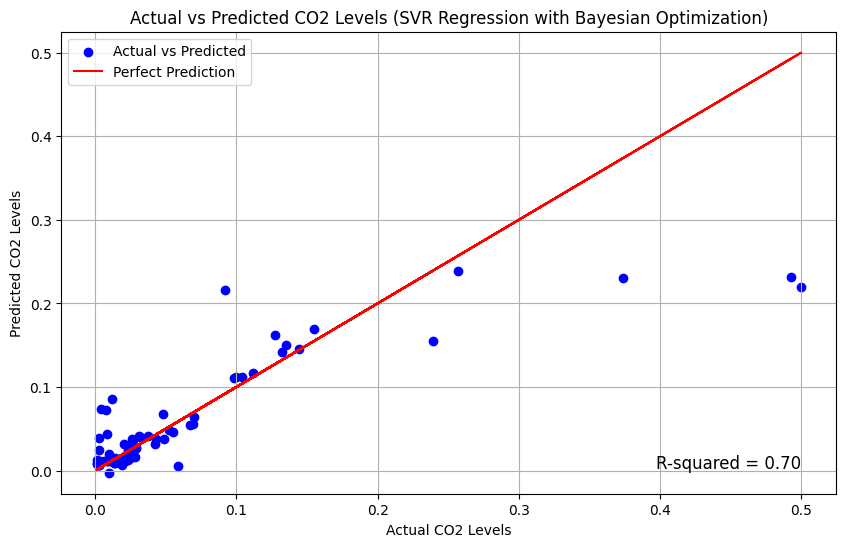

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linestyle='-', label='Perfect Prediction')
plt.title('Actual vs Predicted CO2 Levels (SVR Regression with Bayesian Optimization)')
plt.xlabel('Actual CO2 Levels')
plt.ylabel('Predicted CO2 Levels')
plt.legend()
plt.grid(True)
plt.text(max(y_test), min(y_pred), f'R-squared = {test_score:.2f}', fontsize=12, verticalalignment='bottom', horizontalalignment='right')

# Show plot
plt.show()